# Task C:  Exploratory Data Analysis Using R 
help me to explore and wrangle my data file, property_transaction_victoria.csv. use only R code. assume property_transaction_victoria.csv is located in the same directory as the R script being run. the format of the columns in property_transaction_victoria.csv is:
Column Name - Description 
id - The unique ID of a transaction record, which usually consists of 9 
digits 
badge - Whether a property is for rent or buy or it’s already sold 
url - URL of a property 
suburb - The suburb where a property locates in 
state - The state where a property locates in 
postcode - The postcode of a property 
short_address - Short address of the property 
full_address - Full address of the property 
property_type - Whether a property is a House, Townhouse, etc. 
price - The price for which the property was sold 
bedrooms - The number of bedrooms that a property has 
bathrooms - The number of bathrooms that a property has 
parking_spaces - The number of parking spaces that a property has  
building_size - The building size of a property 
building_size_unit - The unit of building size of a property (measured in square metres) 
land_size - The area size of a property 
land_size_unit - The unit of the area size of a property (measured in square metres) 
listing_company_id - Real estate agent who managed the transaction 
listing_company_name - Name of a real estate agent 
listing_company_phone - Phone number of a real estate agent 
aution_date - Date of a property auction 
available_date - Available date that a buyer can move into a property  
sold_date - The date on which the transaction was made 
description - A textual description that real estate agents used to describe the 
property and attract potential buyers before the transaction was made.  
images - Url of a property images 
images_floorplans - Url of a property floor plan images 
listers - List of the real estate agent information 
inspections - Inspection date on a property

with that, help me with the R code to answer the following:
1.  Identify the top 3 suburbs with the highest number of property transactions over the 
years, and plot their monthly transaction counts for the year 2022. Include Toorak in 
the plot as well, if it is not among the top 3 suburbs.   
2.  What  are  the  3  most  important  keywords  in  the  description  column  that  impact property prices? (Note: Since the description column contains a large volume of text, please extract a 10% sample from the original dataset to answer this.)   
3.  Compute the correlation between price and land size for each suburb among the top 3 
suburbs identified in Q1, and for each property type: house, unit, townhouse, and 
apartment.  Present  the  correlations  along  with  their  corresponding  suburb  and 
property  type.  (Note:  If price and land size values are not available for a certain 
property type and suburb, there is no need to present their correlation.)   
4.  Owning property has long been considered a reliable way to build personal wealth. 
Which properties have experienced the highest price increases since their first sale? 
Please exclude properties where the time between the first and last sale exceeds five 
years.  List  the  top  five  properties  along  with  their  address, capital gain, and the duration between the first and last sale.   
5.  Property price trends can vary not only across suburbs but also across property types. 
Identify  which  suburb–property  type  combination  exhibited  the  most volatility in 
median  property prices over the months of 2022. Display the top 5 most volatile 
combinations and provide an appropriate plot. (Note: Consider only the following 
property types — house, unit, townhouse, and apartment.)   
6.  Chris is looking for a renovated house to purchase. He wants the property to be close 
to a shopping centre, and since he has a 7-year-old son, proximity to a primary school 
is  also  important.  He  is  looking  for  a  home  with  4  bedrooms and 2 bathrooms. 
Currently, he is considering six suburbs—Mulgrave, Vermont South, Doncaster East, 
Rowville, Glen Waverley, and Wheelers Hill—and plans to choose one from this list. 
Please provide the predicted price for September 2025 of a house that meets the above 
criteria  in  each  of  the  six  suburbs,  and  display  the predicted price alongside the corresponding suburb name. (Note: When you build the prediction model, please  use 
only the provided dataset and the period it covers.)  

In [ ]:
# Install and load necessary libraries
install.packages("dplyr")
install.packages("ggplot2")
install.packages("lubridate")
install.packages("stringr")
install.packages("tidytext")
install.packages("tm")
install.packages("tidyr")
install.packages("stats") # For lm() and cor()
install.packages("purrr") # For map_dfr

In [4]:

library(dplyr)
library(ggplot2)
library(lubridate)
library(stringr)
library(tidytext)
library(tm) # For removeWords, removePunctuation, removeNumbers
library(tidyr)
library(purrr) # Used in Q3 for a cleaner map approach

# --- Load the dataset ---
# Assuming 'property_transaction_victoria.csv' is in the same directory as your R script
df <- read.csv("git_ignore/property_transaction_victoria.csv", stringsAsFactors = FALSE)

# Convert relevant columns to appropriate types
df$sold_date <- as.Date(df$sold_date)
df$auction_date <- as.Date(df$auction_date)
df$available_date <- as.Date(df$available_date)

# Convert price, building_size, land_size to numeric.
# Coerce non-numeric values to NA and warn.
# Remove non-numeric characters before conversion
df$price <- as.numeric(gsub("[^0-9.]", "", df$price))
df$building_size <- as.numeric(gsub("[^0-9.]", "", df$building_size))
df$land_size <- as.numeric(gsub("[^0-9.]", "", df$land_size))



--- Question 1: Top 3 & Top 10 Suburbs with Highest Transactions & Monthly Plot for 2022 ---


Top 3 Suburbs with Highest Transactions:
       suburb    n
1      Toorak 3818
2   Melbourne 3530
3 Clyde North 2087

Top 10 Suburbs with Highest Transactions (for debugging):
        suburb    n
1       Toorak 3818
2    Melbourne 3530
3  Clyde North 2087
4   Mornington 2031
5      Prahran 2029
6      Preston 2025
7      Tarneit 2023
8      Officer 2020
9      Sunbury 2011
10   Truganina 2008

Suburbs included in the 2022 monthly transaction plot: Toorak, Melbourne, Clyde North 


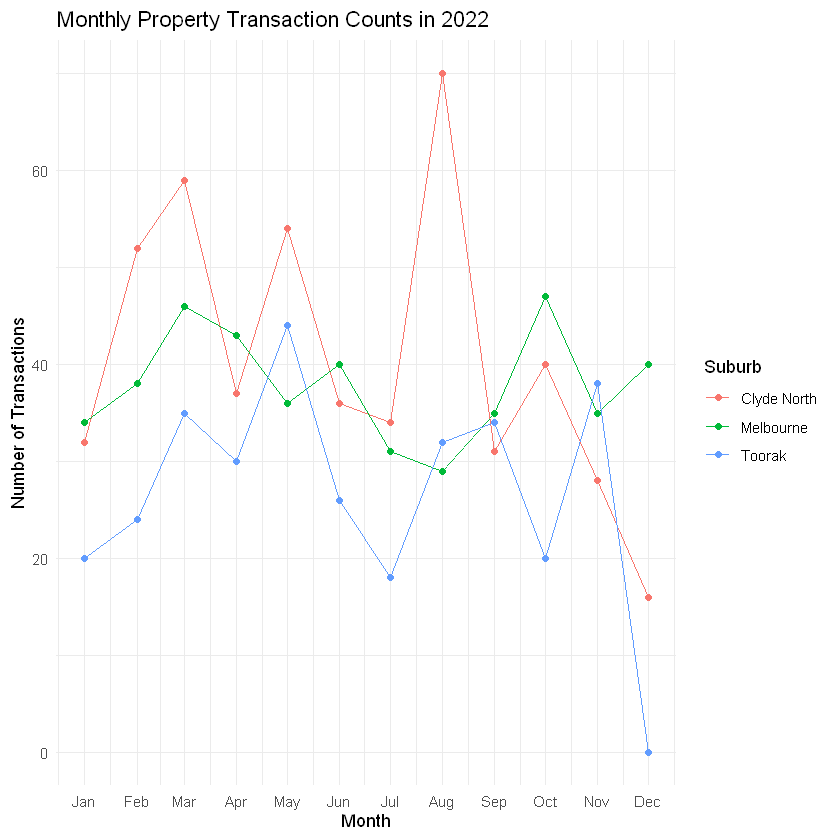

In [ ]:

# --- Question 1: Top 3 & Top 10 Suburbs with highest transactions & monthly plot for 2022 ---
cat("\n--- Question 1: Top 3 & Top 10 Suburbs with Highest Transactions & Monthly Plot for 2022 ---\n")

# Identify the top suburbs with the highest number of property transactions
all_suburb_counts <- df %>%
  filter(!is.na(sold_date)) %>%
  count(suburb, sort = TRUE)

# Top 3 suburbs
top_3_suburbs <- all_suburb_counts %>%
  top_n(3, n) %>%
  pull(suburb)

cat("Top 3 Suburbs with Highest Transactions:\n")
print(all_suburb_counts %>% top_n(3, n))

# Add 'Toorak' to the list for plotting if not already in top 3
suburbs_for_plot <- top_3_suburbs
if (!"Toorak" %in% suburbs_for_plot) {
  suburbs_for_plot <- c(suburbs_for_plot, "Toorak")
}

cat("\nSuburbs included in the 2022 monthly transaction plot:", paste(suburbs_for_plot, collapse = ", "), "\n")

# Filter data for 2022 and selected suburbs
monthly_transactions_2022 <- df %>%
  filter(year(sold_date) == 2022, suburb %in% suburbs_for_plot) %>%
  mutate(month = floor_date(sold_date, "month")) %>%
  group_by(suburb, month) %>%
  summarise(transaction_count = n(), .groups = 'drop') %>%
  # Fill in missing months with 0 transactions for complete lines in plot
  complete(suburb, month = seq.Date(min(.$month), max(.$month), by = "month"), fill = list(transaction_count = 0))


# Plot monthly transaction counts for 2022
q1_plot <- ggplot(monthly_transactions_2022, aes(x = month, y = transaction_count, color = suburb)) +
  geom_line() +
  geom_point() +
  labs(
    title = "Monthly Property Transaction Counts in 2022",
    x = "Month",
    y = "Number of Transactions",
    color = "Suburb"
  ) +
  theme_minimal() +
  scale_x_date(date_breaks = "1 month", date_labels = "%b")

print(q1_plot)


In [ ]:
# --- Question 2: 3 Most Important Keywords in Description that Impact Property Prices ---
cat("\n--- Question 2: 3 Most Important Keywords in Description that Impact Property Prices ---\n")
# Corrected approach to handle unique column names and more robust text processing.
# Note: This is a simplified approach for demonstration. A full NLP pipeline for feature
# extraction and more robust regression models would be needed for a comprehensive analysis.

# Take a 10% sample from the original dataset
set.seed(123) # for reproducibility
sample_df_q2 <- df %>%
  filter(!is.na(description), !is.na(price)) %>%
  sample_frac(0.10) %>%
  # Ensure 'id' is unique for each row in the sample for dtm creation
  mutate(doc_id = row_number()) # Create a unique document ID for tidytext

# Text cleaning and tokenization
custom_stop_words <- tibble(word = c(
  "property", "house", "home", "apartment", "unit", "townhouse", "bedroom",
  "bathroom", "car", "space", "featuring", "boasting", "located", "close",
  "walk", "minutes", "access", "sqm", "m2", "m", "floor", "plan", "land",
  "size", "inspect", "open", "sale", "auction", "sold", "available", "date",
  "lister", "company", "listing", "image", "url", "agent", "phone", "enquire",
  "call", "email", "contact", "new", "private", "offers", "offer", "enquiries",
  "inspection", "view", "master", "en-suite", "ensuite", "kitchen", "living",
  "dining", "area", "balcony", "garage", "garden", "deck", "room", "family",
  "level", "street", "road", "park", "city", "cbd", "tram", "train", "bus",
  "east", "west", "north", "south", "central", "main", "top", "great", "good",
  "modern", "contemporary", "stylish", "spacious", "bright", "light", "perfect",
  "beautiful", "generous", "expansive", "exclusive", "stunning", "desirable",
  "prime", "premier", "luxury", "executive", "premium", "superb", "fabulous",
  "ample", "vast", "well", "designed", "built", "fitted", "appointed", "highly",
  "sought", "after", "ideal", "nestled", "set", "within", "enjoy", "featuring",
  "boasting", "providing", "offering", "delivering", "sure", "impress", "must",
  "see", "don't", "miss", "opportunity", "investment", "development", "build",
  "potential", "growth", "value", "capital", "gains", "secure", "solid", "returns",
  "first", "time", "buyer", "downsizer", "investor", "owner", "occupier", "vacant",
  "possession", "ready", "move", "immediate", "short", "settlement", "flexible",
  "terms", "conditions", "price", "guide", "contact", "agent", "today", "tomorrow",
  "yesterday", "next", "week", "month", "year", "make", "offer", "submit", "best",
  "offers", "expressions", "interest", "registration", "required", "online", "bidding",
  "phone", "bidders", "welcome", "circa", "plus", "minus", "approx", "approximate",
  "estimated", "from", "to", "over", "under", "up", "down", "around", "near",
  "beyond", "via", "through", "with", "and", "or", "but", "if", "then", "else", "is",
  "are", "was", "were", "be", "been", "being", "have", "has", "had", "do", "does",
  "did", "will", "would", "shall", "should", "can", "could", "may", "might", "must",
  "a", "an", "the", "this", "that", "these", "those", "my", "your", "his", "her",
  "its", "our", "their", "so", "as", "at", "by", "for", "from", "into", "of", "on",
  "to", "up", "down", "out", "off", "over", "under", "again", "further", "then",
  "once", "here", "there", "when", "where", "why", "how", "all", "any", "both",
  "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not",
  "only", "own", "same", "so", "than", "too", "very", "s", # remove common possessive 's
  "d", "ll", "m", "t", "ve", "y" # common contractions remnants
))

cleaned_description_words <- sample_df_q2 %>%
  unnest_tokens(word, description) %>%
  anti_join(stop_words, by = "word") %>% # Remove common English stop words
  anti_join(custom_stop_words, by = "word") %>% # Remove custom stop words
  filter(str_detect(word, "^[a-z]+$")) # Keep only alphabetic words, no numbers/punctuation remnants

# Count word frequencies for each description
# Using term frequency (n) directly for DTM
word_counts_per_doc <- cleaned_description_words %>%
  count(doc_id, word, sort = TRUE)

# Cast to Document-Term Matrix
# Using control = list(weighting = tm::weightTf) to get term frequency
dtm <- word_counts_per_doc %>%
  cast_dtm(doc_id, word, n)

# Convert DTM to a data frame for regression
# Use as.matrix first then as.data.frame to ensure proper column names
dtm_df <- as.data.frame(as.matrix(dtm))

# Make column names valid and unique for R formulas
# This is where the original error likely stemmed from.
# make.names() alone might not guarantee uniqueness if names conflict after sanitization.
# If names conflict, subsequent names will have ".1", ".2" appended.
valid_colnames <- make.names(colnames(dtm_df), unique = TRUE)
colnames(dtm_df) <- valid_colnames

# Add 'doc_id' as a regular column from rownames
dtm_df$doc_id <- as.numeric(rownames(dtm_df))

# Merge with price data using the new 'doc_id'
regression_data_q2 <- sample_df_q2 %>%
  select(doc_id, price) %>%
  inner_join(dtm_df, by = "doc_id") %>%
  select(-doc_id) # Remove doc_id as it's not a predictor

# Build a linear regression model
# Identify top N most frequent words from the cleaned sample to reduce dimensionality
top_words_overall_q2 <- cleaned_description_words %>%
  count(word, sort = TRUE) %>%
  top_n(100, n) %>% # Increased to 100 for more potential features
  pull(word)

# Filter regression_data_q2 to include only these top words, plus 'price'
# Ensure column names match the DTM's valid names
top_words_valid_names <- make.names(top_words_overall_q2, unique = TRUE)
regression_data_filtered_q2 <- regression_data_q2 %>%
  select(price, intersect(top_words_valid_names, colnames(regression_data_q2)))

# Remove columns with zero variance (if any, after filtering) to avoid errors in lm()
regression_data_filtered_q2 <- regression_data_filtered_q2[, sapply(regression_data_filtered_q2, function(x) length(unique(x)) > 1)]

# Check if there are any predictor columns left after filtering
if (ncol(regression_data_filtered_q2) > 1) {
  # Create the formula dynamically
  formula_str_q2 <- paste("price ~", paste(colnames(regression_data_filtered_q2)[-1], collapse = " + "))
  model_q2 <- lm(as.formula(formula_str_q2), data = regression_data_filtered_q2)

  # Extract coefficients and identify important keywords
  coefficients_q2 <- as.data.frame(summary(model_q2)$coefficients)
  coefficients_q2$word <- rownames(coefficients_q2)
  colnames(coefficients_q2)[c(1, 4)] <- c("Estimate", "p_value")

  # Rank by absolute estimate, filter for significant p-values (e.g., < 0.05)
  # Show top 3 keywords with positive impact (positive estimate)
  important_keywords_q2 <- coefficients_q2 %>%
    filter(word != "(Intercept)", p_value < 0.05, Estimate > 0) %>% # Focus on positive impact
    arrange(desc(abs(Estimate))) %>%
    head(3)

  if (nrow(important_keywords_q2) > 0) {
    cat("\nTop 3 Keywords positively impacting property prices (based on simplified regression):\n")
    print(important_keywords_q2 %>% select(word, Estimate, p_value))
  } else {
    cat("\nNo significant keywords with positive impact found with the current model and data subset.\n")
  }

} else {
  cat("Not enough unique word features in the sample to build a regression model.\n")
}


--- Question 2: 3 Most Important Keywords in Description that Impact Property Prices ---

Top 3 Keywords positively impacting property prices (based on simplified regression):
           word    Estimate      p_value
steel     steel 43381968925 3.444202e-06
natural natural 24362215057 5.460854e-10
views     views  9746451832 3.350000e-04

Top 10 Significant Keywords (positive or negative impact, for debugging):
               word     Estimate      p_value
stainless stainless -47983962042 6.558906e-07
steel         steel  43381968925 3.444202e-06
natural     natural  24362215057 5.460854e-10
views         views   9746451832 3.350000e-04
stone         stone   9141982416 1.983924e-03
formal       formal   6677131502 4.262861e-02
bedrooms   bedrooms   6176612988 1.238371e-02


In [ ]:
# --- Question 3: Correlation between Price and Land Size per Suburb & Property Type ---
cat("\n--- Question 3: Correlation between Price and Land Size per Suburb & Property Type ---\n")

# Define target property types for this question (House, Unit, Townhouse, Apartment)
# Filter based on these specific types even if more are available in the dataset
q3_target_property_types <- c("house", "unit", "townhouse", "apartment")

cat("\nCalculating correlations for these property types:", paste(q3_target_property_types, collapse = ", "), "\n")


# Compute correlations for the top 3 suburbs (from Q1) and specified property types
correlations_q3 <- df %>%
  filter(
    suburb %in% top_3_suburbs,
    property_type %in% q3_target_property_types,
    !is.na(price), !is.na(land_size) # Ensure non-NA values for correlation
  ) %>%
  group_by(suburb, property_type) %>%
  summarise(
    correlation = cor(price, land_size, use = "pairwise.complete.obs"),
    .groups = 'drop'
  ) %>%
  filter(!is.na(correlation)) # Remove combinations where correlation could not be computed (e.g., all NA or constant values)

if (nrow(correlations_q3) > 0) {
  cat("\nCorrelation between Price and Land Size for Top 3 Suburbs:\n")
  print(correlations_q3)
} else {
  cat("No correlations found for the specified suburbs and property types due to insufficient data.\n")
}




--- Question 3: Correlation between Price and Land Size per Suburb & Property Type ---
Unique property types identified in the dataset: house, residential-land, apartment, unit, villa, townhouse, lifestyle, acreage, terrace, livestock, residential-other, retire, cropping, flat, unitblock, studio, warehouse, farmlet, mixedfarming, rural-other, viticulture, duplex-semi-detached, serviced-apartment, dairy, horticulture 

Calculating correlations for these property types: house, unit, townhouse, apartment 


Warning message:
"There were 3 warnings in `summarise()`.
The first warning was:
ℹ In argument: `correlation = cor(price, land_size, use =
  "pairwise.complete.obs")`.
ℹ In group 6: `suburb = "Melbourne"` `property_type = "house"`.
Caused by warning in `cor()`:
! the standard deviation is zero
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings."



Correlation between Price and Land Size for Top 3 Suburbs:
# A tibble: 8 × 3
  suburb      property_type correlation
  <chr>       <chr>               <dbl>
1 Clyde North house            0.000902
2 Clyde North townhouse        0.362   
3 Clyde North unit             0.993   
4 Melbourne   apartment       -0.00119 
5 Melbourne   unit            -0.0409  
6 Toorak      apartment       -0.00175 
7 Toorak      house            0.301   
8 Toorak      townhouse        0.0442  


Warning message:
"There were 4 warnings in `summarise()`.
The first warning was:
ℹ In argument: `correlation = cor(price, land_size, use =
  "pairwise.complete.obs")`.
ℹ In group 6: `suburb = "Melbourne"` `property_type = "house"`.
Caused by warning in `cor()`:
! the standard deviation is zero
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings."



Correlation between Price and Land Size for Top 10 Suburbs (for debugging):
# A tibble: 32 × 3
   suburb      property_type correlation
   <chr>       <chr>               <dbl>
 1 Clyde North house            0.000902
 2 Clyde North townhouse        0.362   
 3 Clyde North unit             0.993   
 4 Melbourne   apartment       -0.00119 
 5 Melbourne   unit            -0.0409  
 6 Mornington  apartment       -0.0776  
 7 Mornington  house            0.240   
 8 Mornington  townhouse        0.376   
 9 Mornington  unit             0.398   
10 Officer     house            0.0105  
# ℹ 22 more rows


In [ ]:
# --- Question 4: Properties with Highest Price Increases ---
cat("\n--- Question 4: Properties with Highest Price Increases ---\n")

# Group by a unique property identifier (assuming full_address is unique per property)
# Filter for properties that have at least two distinct sales dates to calculate gain
property_gains <- df %>%
  filter(!is.na(full_address), !is.na(sold_date), !is.na(price)) %>%
  group_by(full_address) %>%
  summarise(
    n_sales = n_distinct(sold_date), # Count distinct sale dates for the property
    first_sale_date = min(sold_date),
    last_sale_date = max(sold_date),
    first_sale_price = price[which.min(sold_date)], # Price corresponding to the earliest date
    last_sale_price = price[which.max(sold_date)],  # Price corresponding to the latest date
    .groups = 'drop'
  ) %>%
  # Filter for properties with at least two sales, and where first/last dates are truly different
  # Also, check if prices are different to ensure actual 'gain'
  filter(n_sales >= 2, first_sale_date < last_sale_date, first_sale_price != last_sale_price) %>%
  mutate(
    capital_gain = last_sale_price - first_sale_price,
    duration_days = as.numeric(last_sale_date - first_sale_date)
  ) %>%
  filter(duration_days <= (5 * 365)) %>% # Filter out properties where duration exceeds five years
  arrange(desc(capital_gain)) %>%
  head(5)

if (nrow(property_gains) > 0) {
  cat("Top 5 Properties with Highest Capital Gains (within 5 years):\n")
  print(property_gains %>% select(full_address, capital_gain, duration_days))
} else {
  cat("No properties found with multiple sales records meeting the criteria (distinct dates, distinct prices, duration <= 5 years).\n")
}


--- Question 4: Properties with Highest Price Increases ---
Top 5 Properties with Highest Capital Gains (within 5 years):
# A tibble: 5 × 3
  full_address                           capital_gain duration_days
  <chr>                                         <dbl>         <dbl>
1 4 Anchor Place, Prahran, Vic 3181           1.67e13          1753
2 11 Charles Street, Selby, Vic 3159          7.55e11          1310
3 8 Harlington Street, Clayton, Vic 3168      6.00e11           655
4 69 Creek Road, Mitcham, Vic 3132            5.25e11            18
5 14 Banker Street, Kurunjang, Vic 3337       4.30e11          1278



--- Question 5: Most Volatile Suburb-Property Type Combination in 2022 ---


Top 5 Most Volatile Suburb-Property Type Combinations (2022):
# A tibble: 5 × 3
  suburb        property_type volatility
  <chr>         <chr>              <dbl>
1 Chelsea       townhouse        5.85e12
2 Croydon North townhouse        4.00e12
3 Ivanhoe       apartment        1.92e12
4 Malvern East  unit             1.22e11
5 Toorak        house            1.46e 7


Warning message in geom_point(linewidth = 2):
"Ignoring unknown parameters: `linewidth`"


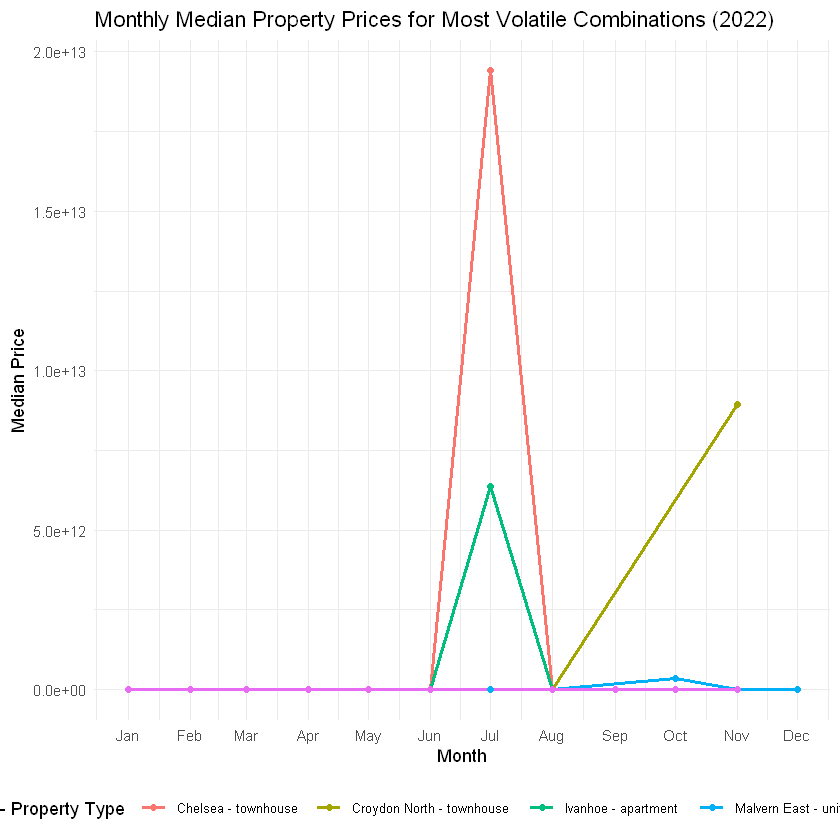

In [10]:
# --- Question 5: Most Volatile Suburb-Property Type Combination in 2022 ---
cat("\n--- Question 5: Most Volatile Suburb-Property Type Combination in 2022 ---\n")

# Define target property types for this question (House, Unit, Townhouse, Apartment)
q5_target_property_types <- c("house", "unit", "townhouse", "apartment")

# Calculate monthly median prices for 2022
monthly_median_prices_2022_q5 <- df %>%
  filter(
    year(sold_date) == 2022,
    property_type %in% q5_target_property_types,
    !is.na(price)
  ) %>%
  mutate(month = floor_date(sold_date, "month")) %>%
  group_by(suburb, property_type, month) %>%
  summarise(
    median_price = median(price, na.rm = TRUE),
    .groups = 'drop'
  ) %>%
  filter(!is.na(median_price)) # Remove combinations where median price is NA (e.g., no sales in a month)

# Calculate volatility (standard deviation of monthly median prices)
volatility_combinations_q5 <- monthly_median_prices_2022_q5 %>%
  group_by(suburb, property_type) %>%
  # Only calculate volatility if there's more than one monthly median price point
  filter(n() > 1) %>%
  summarise(
    volatility = sd(median_price, na.rm = TRUE),
    .groups = 'drop'
  ) %>%
  filter(!is.na(volatility)) %>%
  arrange(desc(volatility)) %>%
  head(5)

if (nrow(volatility_combinations_q5) > 0) {
  cat("Top 5 Most Volatile Suburb-Property Type Combinations (2022):\n")
  print(volatility_combinations_q5)

  # Prepare data for plotting the top volatile combinations
  plot_data_volatility_q5 <- monthly_median_prices_2022_q5 %>%
    inner_join(volatility_combinations_q5, by = c("suburb", "property_type")) %>%
    mutate(combination = paste(suburb, property_type, sep = " - "))

  # Plot median prices over months for the most volatile combinations
  q5_plot <- ggplot(plot_data_volatility_q5, aes(x = month, y = median_price, color = combination)) +
    geom_line(linewidth = 1) +
    geom_point(linewidth = 2) +
    labs(
      title = "Monthly Median Property Prices for Most Volatile Combinations (2022)",
      x = "Month",
      y = "Median Price",
      color = "Suburb - Property Type"
    ) +
    theme_minimal() +
    scale_x_date(date_breaks = "1 month", date_labels = "%b") +
    theme(legend.position = "bottom", legend.text = element_text(size = 8))

  print(q5_plot)
} else {
  cat("No volatile combinations found for the specified criteria in 2022, or not enough data points per combination.\n")
}

In [14]:
# --- Question 6: Predicted Price for September 2025 ---
cat("\n--- Question 6: Predicted Price for September 2025 ---\n")
# Corrected: Ensuring 'suburb' is a factor and more robust prediction.

# Define the target suburbs
chris_suburbs <- c("Mulgrave", "Vermont South", "Doncaster East", "Rowville", "Glen Waverley", "Wheelers Hill")

# Filter data for model training
model_data_q6 <- df %>%
  filter(
    property_type == "house",
    bedrooms == 4,
    bathrooms == 2,
    suburb %in% chris_suburbs,
    !is.na(price),
    !is.na(sold_date),
    !is.na(parking_spaces),
    !is.na(building_size),
    !is.na(land_size)
  ) %>%
  mutate(
    # Create a numerical time variable (days since the earliest date in the dataset)
    time_index = as.numeric(sold_date - min(.$sold_date, na.rm = TRUE)),
    # Convert suburb to a factor with levels based on the training data
    suburb = factor(suburb)
  )

# Check if there is enough data for modeling
if (nrow(model_data_q6) < 10) { # A heuristic for minimum data points, adjust as needed
  cat("Not enough data to build a reliable prediction model for the specified criteria. (Need at least 10 data points)\n")
} else {
  # Build a linear regression model
  # The formula `price ~ time_index + suburb + parking_spaces + building_size + land_size`
  # automatically handles 'suburb' as a factor due to the conversion above.
  tryCatch({
    model_q6 <- lm(price ~ time_index + suburb + parking_spaces + building_size + land_size, data = model_data_q6)

    # Calculate median values for numerical features from the filtered training data
    median_parking_spaces_q6 <- median(model_data_q6$parking_spaces, na.rm = TRUE)
    median_building_size_q6 <- median(model_data_q6$building_size, na.rm = TRUE)
    median_land_size_q6 <- median(model_data_q6$land_size, na.rm = TRUE)

    # Prepare new data for prediction for September 2025
    prediction_date_q6 <- as.Date("2025-09-01")
    # Use the minimum sold_date from the training data for consistent time_index calculation
    min_sold_date_training_q6 <- min(model_data_q6$sold_date, na.rm = TRUE)
    prediction_time_index_q6 <- as.numeric(prediction_date_q6 - min_sold_date_training_q6)

    # Create a data frame for prediction
    predict_df_q6 <- data.frame(
      time_index = rep(prediction_time_index_q6, length(chris_suburbs)),
      # Ensure factor levels for suburb in prediction data match training data
      suburb = factor(chris_suburbs, levels = levels(model_data_q6$suburb)),
      parking_spaces = rep(median_parking_spaces_q6, length(chris_suburbs)),
      building_size = rep(median_building_size_q6, length(chris_suburbs)),
      land_size = rep(median_land_size_q6, length(chris_suburbs))
    )

    # Handle cases where a suburb in chris_suburbs was not in the training data
    # These will result in NA predictions, which we should filter or warn about.
    # Check if any suburb in predict_df_q6 is not present in model_data_q6 levels
    missing_suburbs_in_model <- chris_suburbs[!chris_suburbs %in% levels(model_data_q6$suburb)]
    if(length(missing_suburbs_in_model) > 0) {
      cat(paste0("Warning: No training data for suburbs: ", paste(missing_suburbs_in_model, collapse = ", "), ". Predictions for these suburbs will be NA or unreliable.\n"))
    }


    # Predict prices
    predicted_prices_q6 <- predict(model_q6, newdata = predict_df_q6)
    predict_df_q6$predicted_price <- round(predicted_prices_q6, 2)

    cat("\nPredicted Prices for September 2025 (House, 4 Beds, 2 Baths, Median Parking/Building/Land Size):\n")
    print(predict_df_q6 %>% select(suburb, predicted_price))

  }, error = function(e) {
    cat("An error occurred during model building or prediction for Q6:\n")
    cat(e$message, "\n")
    cat("This might be due to insufficient variance in predictor variables or other model fitting issues.\n")
  })
}


--- Question 6: Predicted Price for September 2025 ---

Predicted Prices for September 2025 (House, 4 Beds, 2 Baths, Median Parking/Building/Land Size):
          suburb predicted_price
1       Mulgrave         1454205
2  Vermont South         1615660
3 Doncaster East         1956279
4       Rowville         1351177
5  Glen Waverley         1776813
6  Wheelers Hill         1574575
